<a href="https://colab.research.google.com/github/piyush1856/neural-network/blob/main/_1forward_and_backward_propogation_softmax_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 32.8MB/s]


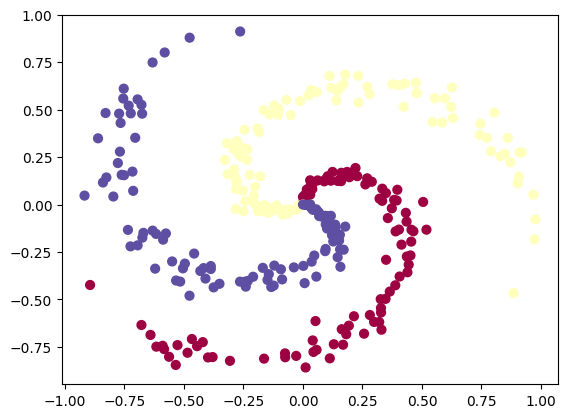

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
df = pd.read_csv("/content/spiral.csv")
plt.scatter(df["x1"],df["x2"],c=df["y"], s=40, cmap=plt.cm.Spectral)


In [2]:
df.head()

,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


In [3]:
# Separating feature and label columns
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [4]:
d = X.shape[1] # 2 - dimensionality, number of features
n = len(np.unique(y)) #3 - number of classes
m = X.shape[0] # number of examples
print(d, n, m)

2 3 300


### Forward Propogation

Let's initialise the parameters

In [5]:
# initialize parameters randomly
W = 0.01 * np.random.randn(d,n)
b = np.zeros((1,n))

calculate z using  𝑋𝑊


In [6]:
# compute scores for a linear classifier
z = np.dot(X, W) + b
print(z.shape) # should be mXn = #examples X #output

(300, 3)


Lets raise these scores to base  𝑒 , and normalise them to get probabilities

In [7]:
exp_z = np.exp(z)
probs = exp_z / np.sum(exp_z, axis=1, keepdims=True) # explain why axis=1 we have to do all columns

Calculate the loss.

In [8]:
def loss(y, probs):
    m = y.shape[0]    #dz = probs
    error = -np.log(probs[range(m), y])
    return np.sum(error)/m
loss(y, probs)

np.float64(1.0986497100409716)

### Backward Propagation

In [9]:
dz = probs # dz = probabilities of class
dz[range(m),y] -= 1  # subtracting 1 from class where i == j as dz = pi - I
#dz = dz/m

In [10]:
X.shape # shape (m, d)

(300, 2)

In [11]:
# shape (m, n ) as we have m samples and each sample has 3 class probab.
dz.shape

(300, 3)

In [12]:
# dW = dZ . X

dW = np.dot(X.T, dz) # check dimensions (2, 300) x (300 , 3) => (2, 3)
dW.shape

(2, 3)

In [13]:
b.shape # shape (1, n)

(1, 3)

In [14]:
db = np.sum(dz, axis=0, keepdims=True)
db.shape

(1, 3)

In [15]:
lr = 0.1
W += -lr * dW
b += -lr * db

In [16]:
max_iters = 500
lr = 1

d = X.shape[1]
n = len(np.unique(y))
m = X.shape[0]
W = 0.01 * np.random.randn(d,n)
b = np.zeros((1,n))
loss_history = []

for i in range(max_iters):
    # evaluate the class probs
    z = np.dot(X, W) + b
    exp_z = np.exp(z)
    probs = exp_z/np.sum(exp_z, axis=1, keepdims=True)

    # compute the loss: average cross-entropy loss and regularization
    error = -np.log(probs[range(m), y])
    loss = np.sum(error)/m
    loss_history.append(loss)
    if i % 100 == 0:
        print(f"iteration: {i}, loss: {loss}")


    # compute the gradient on score
    dZ = probs
    dZ[range(m),y] -= 1
    dZ = dZ/m
    dW = np.dot(X.T, dZ)
    db = np.sum(dZ, axis=0, keepdims=True)

    # perform a parameter update using gradient descent
    W += -lr * dW
    b += -lr * db
# history = pd.DataFrame({'step': list(range(max_iters)), 'loss': loss_history})
# history.plot(x='step', y='loss',xlabel='step', ylabel='loss')

iteration: 0, loss: 1.097260263198607
iteration: 100, loss: 0.7447126301086621
iteration: 200, loss: 0.7405313650707619
iteration: 300, loss: 0.7402161044278308
iteration: 400, loss: 0.7401859826476418


In [17]:
def predict(X):
    Z = np.dot(X, W) + b
    Z_e = np.exp(Z)
    probs = Z_e/np.sum(Z_e, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

print(f"Training Accuracy {np.sum(predict(X) == y)/m}")

Training Accuracy 0.5266666666666666


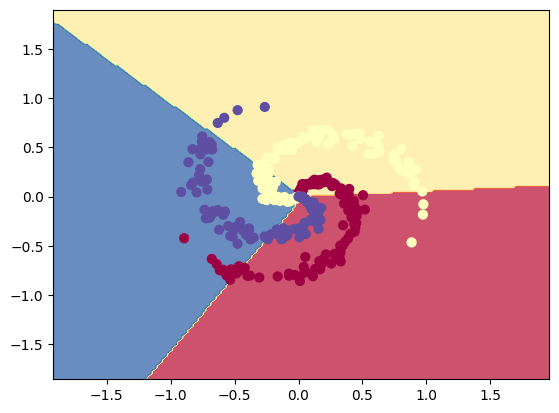

In [19]:
import matplotlib.pyplot as plt

# create a 2D grid
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict for all the points in the grid
y_hat = predict(np.c_[xx.ravel(), yy.ravel()]) # concatenates along second axis
y_hat = y_hat.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### Softmax classifier wrapped in Python class

In [20]:
class SoftmaxClassfier:
    def __init__(self, n_features, n_outputs):
        self.d = n_features
        self.n = n_outputs
        self.W = 0.01 * np.random.randn(self.d,self.n)
        self.b = np.zeros((1,self.n))
        self.loss = []

    def fwdprop(self, X):
        z = np.dot(X, self.W) + self.b
        exp_z = np.exp(z)
        probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        return probs

    def cce_loss(self, probs, y):
        m = y.shape[0]
        error = -np.log(probs[range(m), y])
        return np.sum(error)/m

    def backprop(self, probs, y):
        m = y.shape[0]
        dz = probs
        dz[range(m),y] -= 1
        dz = dz/m
        dW = np.dot(X.T, dz)
        db = np.sum(dz, axis=0, keepdims=True)
        return dW, db

    def fit(self, X, y, lr=0.1, max_iters=50):

        for i in range(max_iters):
            # evaluate the class probs
            probs = self.fwdprop(X)

            # compute the loss: average cross-entropy loss and regularization
            loss = self.cce_loss(probs, y)

            # compute the gradient on score
            dW, db = self.backprop(probs, y)

            # perform a parameter update using gradient descent
            self.W += -lr * dW
            self.b += -lr * db
            self.loss.append(loss)

        self.history = pd.DataFrame({
        'step': list(range(max_iters)),
        'loss': self.loss})

    def plot_loss(self):
        return self.history.plot(x='step', y='loss',xlabel='step', ylabel='loss')

    def predict(self, X):
        probs = self.fwdprop(X)
        return np.argmax(probs, axis=1)

model = SoftmaxClassfier(n_features=2, n_outputs=3)
model.fit(X, y, lr=1, max_iters=500)
#model.plot_loss()
#print('training accuracy:', np.sum(model.predict(X) == y)/X.shape[0])

In [21]:
X = [[100, 129, 157, 133], [168, 150, 30, 19], [4, 148, 106, 74], [123, 195, 60, 93], [169, 40, 188, 179], [40, 59, 29, 94], [165, 126, 16, 99], [167, 157, 65, 23], [128, 87, 37, 111], [191, 154, 89, 134], [101, 41, 145, 112], [43, 110, 197, 118], [147, 22, 109, 139], [11, 161, 135, 119], [26, 48, 199, 182], [96, 100, 82, 87], [149, 2, 8, 10], [5, 38, 166, 100], [193, 117, 59, 164], [133, 5, 38, 163], [88, 177, 84, 114], [9, 132, 177, 24], [94, 130, 83, 131], [77, 11, 141, 81], [154, 198, 175, 98], [21, 148, 170, 122], [185, 145, 101, 183], [100, 196, 111, 11], [97, 147, 112, 11], [25, 97, 95, 45], [6, 89, 88, 38], [51, 16, 151, 3], [90, 174, 122, 157], [2, 133, 121, 199], [15, 78, 163, 180], [103, 118, 7, 179], [102, 179, 157, 183], [113, 139, 195, 122], [55, 88, 68, 117], [115, 185, 93, 102], [139, 82, 3, 165], [135, 29, 78, 11], [11, 16, 60, 123], [103, 191, 187, 129], [146, 181, 28, 192], [85, 73, 136, 139], [117, 179, 81, 183], [15, 131, 106, 28], [58, 78, 111, 65], [76, 11, 25, 103], [11, 90, 162, 129], [144, 1, 16, 33], [33, 172, 40, 72], [106, 83, 160, 151], [68, 159, 150, 64], [31, 79, 83, 15], [51, 140, 173, 10], [105, 80, 70, 21], [195, 80, 64, 129], [50, 96, 107, 82], [185, 150, 15, 143], [28, 71, 27, 57], [58, 13, 146, 78], [20, 71, 183, 44], [91, 44, 15, 87], [77, 157, 95, 110], [132, 28, 193, 49], [177, 87, 57, 41], [194, 175, 17, 20], [166, 64, 134, 150], [79, 74, 162, 168], [166, 149, 34, 117], [160, 170, 127, 44], [99, 41, 103, 155], [48, 127, 138, 68], [17, 3, 101, 94], [29, 102, 123, 158], [194, 60, 135, 179], [73, 192, 145, 168], [21, 94, 154, 143], [17, 10, 145, 131], [73, 29, 195, 199], [132, 189, 90, 100], [134, 32, 81, 119], [118, 37, 119, 27], [51, 78, 187, 86], [95, 8, 56, 29], [156, 162, 186, 127], [126, 111, 144, 59], [7, 140, 32, 75], [40, 0, 109, 92], [165, 175, 61, 103], [178, 68, 185, 119], [132, 105, 36, 80], [165, 117, 35, 176], [128, 49, 185, 9], [50, 176, 12, 198], [124, 164, 99, 102], [36, 30, 114, 147], [166, 172, 35, 14]]
y = [1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]

In [22]:
import numpy as np
X = np.array(X)
#dependent variable
y = np.array(y)

In [23]:
X.shape

(100, 4)

In [24]:
y.shape

(100,)

In [25]:
m = X.shape[0]  #no. of samples
n = X.shape[1]  #no. of features
c = 1  #no. of classes in the data and therefore no. of neurons in the layer
# example of a function for calculating softmax for a list of numbers
from numpy import exp

# calculate the softmax of a vector
def softmax(vector):
 e = exp(vector)
 return e / e.sum()
#weight vector of dimension (number of features, number of neurons in the layer)
for i in range(m):
  w = np.random.randn(n,c)
  b = np.zeros((1, c))
  z = np.dot(X,w) + b
  # a = np.exp(z)
  result = softmax(z)
  print(result)

[[1.12653373e-067]
 [1.92465863e-187]
 [1.02089755e-158]
 [5.09086432e-116]
 [8.63558876e-001]
 [8.55123338e-142]
 [2.92959162e-107]
 [1.65455242e-178]
 [1.92982066e-101]
 [6.73858624e-054]
 [9.68974479e-093]
 [1.05644139e-091]
 [4.85494696e-059]
 [6.91658130e-106]
 [4.65624783e-030]
 [1.50733417e-127]
 [2.28398796e-207]
 [2.92859687e-125]
 [4.36364650e-027]
 [1.36409503e-047]
 [1.63658190e-099]
 [4.71804469e-200]
 [1.86222621e-081]
 [6.61936784e-132]
 [2.25019447e-087]
 [8.99080172e-096]
 [8.37620916e-003]
 [8.47229380e-200]
 [2.34723310e-201]
 [1.81138881e-186]
 [2.01914653e-199]
 [7.46323212e-218]
 [5.02192258e-049]
 [3.25228306e-027]
 [3.62092921e-039]
 [4.00755456e-040]
 [4.05356793e-014]
 [1.50190334e-070]
 [2.92546527e-108]
 [3.64717855e-104]
 [2.10897334e-047]
 [2.17145759e-199]
 [4.72257896e-115]
 [1.03139895e-065]
 [3.74414467e-012]
 [4.83724117e-069]
 [4.13307458e-021]
 [2.39067659e-204]
 [6.28606283e-156]
 [2.33726127e-125]
 [3.86636668e-093]
 [1.64093239e-183]
 [1.38713875

/tmp/ipython-input-2728434170.py:9: RuntimeWarning: overflow encountered in exp
  e = exp(vector)
/tmp/ipython-input-2728434170.py:10: RuntimeWarning: invalid value encountered in divide
  return e / e.sum()
